In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Data Exploration for numeric features
## 1. load the data from "data/epi-recipes-num.csv"

In [2]:
df = pd.read_csv('../data/epi-recipes-num.csv')
df.shape

(35441, 15)

In [3]:
df.head()

,title,healthy,rating,reviewcount,makeagain,nutritions.Calories,nutritions.Carbohydrates,nutritions.Cholesterol,nutritions.Fat,nutritions.Fiber,nutritions.Monounsaturated Fat,nutritions.Polyunsaturated Fat,nutritions.Protein,nutritions.Saturated Fat,nutritions.Sodium
0,"Chicken Salad with Apricots, Celery, and Blue ...",False,3.0,8.0,88.0,301.0,9.0,76.0,19.0,3.0,7.0,3.0,22.0,9.0,605.0
1,Grilled Lemon-Pepper Chicken,False,0.0,0.0,0.0,403.0,4.0,124.0,31.0,0.0,13.0,5.0,27.0,10.0,551.0
2,Instant Pot Chicken Stock,False,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Instant Pot Refried Black Beans,False,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Instant Pot Bolognese,False,0.0,0.0,0.0,295.0,25.0,42.0,15.0,1.0,6.0,1.0,13.0,6.0,329.0


In [4]:
df2 = df.dropna()
df2.shape

(20630, 15)

In [5]:
df2.describe()

,rating,reviewcount,makeagain,nutritions.Calories,nutritions.Carbohydrates,nutritions.Cholesterol,nutritions.Fat,nutritions.Fiber,nutritions.Monounsaturated Fat,nutritions.Polyunsaturated Fat,nutritions.Protein,nutritions.Saturated Fat,nutritions.Sodium
count,20630.000000,20630.000000,20630.000000,20630.000000,20630.000000,20630.000000,20630.000000,20630.000000,20630.000000,20630.000000,20630.000000,20630.000000,20630.000000
mean,3.095807,23.519098,79.447261,599.314154,47.841590,124.917693,35.154532,3.963209,14.429762,4.551381,23.578236,13.293311,598.730829
std,0.895434,39.688269,25.993800,2942.848877,547.414878,261.830501,107.104669,15.512508,49.352972,12.674339,87.864232,42.452752,1903.563872
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.000000,75.000000,248.000000,13.000000,26.000000,12.000000,1.000000,4.000000,1.000000,5.000000,4.000000,142.000000
50%,3.500000,11.000000,88.000000,405.000000,29.000000,73.000000,22.000000,3.000000,8.000000,2.000000,11.000000,8.000000,358.000000
75%,3.500000,27.000000,96.000000,648.750000,53.000000,151.000000,38.000000,5.000000,15.000000,5.000000,30.000000,14.000000,752.000000
max,4.000000,770.000000,100.000000,377239.000000,77371.000000,20077.000000,9124.000000,2085.000000,4288.000000,972.000000,10324.000000,4010.000000,241631.000000


## 2. deal with outliers

In [10]:
df2.columns

Index(['title', 'healthy', 'rating', 'reviewcount', 'makeagain',
       'nutritions.Calories', 'nutritions.Carbohydrates',
       'nutritions.Cholesterol', 'nutritions.Fat', 'nutritions.Fiber',
       'nutritions.Monounsaturated Fat', 'nutritions.Polyunsaturated Fat',
       'nutritions.Protein', 'nutritions.Saturated Fat', 'nutritions.Sodium'],
      dtype='object')

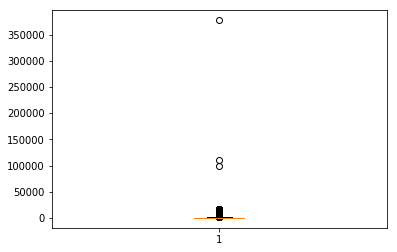

In [6]:
plt.boxplot(df2['nutritions.Calories'])
plt.show()

In [7]:
def rm_outliers(data, m=3):
    return data[abs(data - np.mean(data)) < m * np.std(data)]

In [8]:
df2['calories'] = rm_outliers(df2['nutritions.Calories'])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


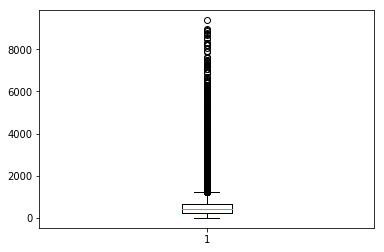

In [9]:
plt.boxplot(df2['calories'].dropna())
plt.show()

In [10]:
len(df2['calories'].dropna())

20586

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


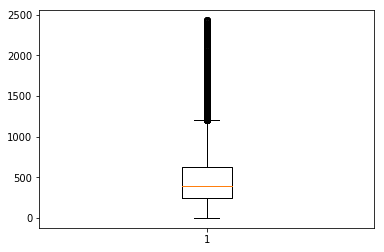

In [11]:
df2['calories'] = rm_outliers(df2['calories'])
plt.boxplot(df2['calories'].dropna())
plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


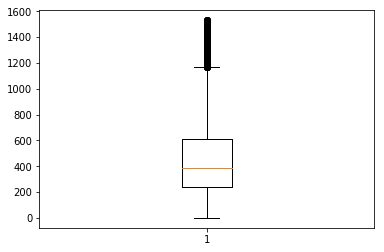

In [24]:
df2['calories'] = rm_outliers(df2['calories'])
plt.boxplot(df2['calories'].dropna())
plt.show()

In [25]:
df3 = df2.dropna()
df3 = df3.drop(['calories'], axis=1)
df3.shape

(19861, 15)

In [26]:
df3.head()

,title,healthy,rating,reviewcount,makeagain,nutritions.Calories,nutritions.Carbohydrates,nutritions.Cholesterol,nutritions.Fat,nutritions.Fiber,nutritions.Monounsaturated Fat,nutritions.Polyunsaturated Fat,nutritions.Protein,nutritions.Saturated Fat,nutritions.Sodium
0,"Chicken Salad with Apricots, Celery, and Blue ...",False,3.0,8.0,88.0,301.0,9.0,76.0,19.0,3.0,7.0,3.0,22.0,9.0,605.0
1,Grilled Lemon-Pepper Chicken,False,0.0,0.0,0.0,403.0,4.0,124.0,31.0,0.0,13.0,5.0,27.0,10.0,551.0
4,Instant Pot Bolognese,False,0.0,0.0,0.0,295.0,25.0,42.0,15.0,1.0,6.0,1.0,13.0,6.0,329.0
9,Slippery When Wet,False,0.0,0.0,0.0,204.0,14.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0
10,Thai-Style Squid and Cucumber Salad,False,4.0,1.0,100.0,446.0,16.0,396.0,29.0,2.0,17.0,7.0,32.0,3.0,780.0


## 3. data exploration & viz

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


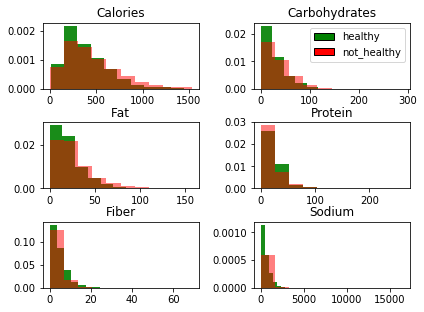

In [27]:
df_h = df3[df3.healthy == 1]
df_n = df3[df3.healthy == 0]

plt.figure(1)

plt.subplot(321)
plt.hist(df_h['nutritions.Calories'], bins=10, normed=True, color='green', alpha=.9)
plt.hist(df_n['nutritions.Calories'], bins=10, normed=True, color='red', alpha=.5)
plt.title("Calories")

plt.subplot(322)
plt.hist(df_h['nutritions.Carbohydrates'], bins=10, normed=True, color='green', alpha=.9)
plt.hist(df_n['nutritions.Carbohydrates'], bins=10, normed=True, color='red', alpha=.5)
plt.title("Carbohydrates")
from matplotlib.patches import Rectangle
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in ['green','red']]
labels= ['healthy','not_healthy']
plt.legend(handles, labels)

plt.subplot(323)
plt.hist(df_h['nutritions.Fat'], bins=10, normed=True, color='green', alpha=.9)
plt.hist(df_n['nutritions.Fat'], bins=10, normed=True, color='red', alpha=.5)
plt.title("Fat")

plt.subplot(324)
plt.hist(df_h['nutritions.Protein'], bins=10, normed=True, color='green', alpha=.9)
plt.hist(df_n['nutritions.Protein'], bins=10, normed=True, color='red', alpha=.5)
plt.title("Protein")

plt.subplot(325)
plt.hist(df_h['nutritions.Fiber'], bins=10, normed=True, color='green', alpha=.9)
plt.hist(df_n['nutritions.Fiber'], bins=10, normed=True, color='red', alpha=.5)
plt.title("Fiber")

plt.subplot(326)
plt.hist(df_h['nutritions.Sodium'], bins=10, normed=True, color='green', alpha=.9)
plt.hist(df_n['nutritions.Sodium'], bins=10, normed=True, color='red', alpha=.5)
plt.title("Sodium")

plt.subplots_adjust(top=1, bottom=0.08, left=0.10, right=0.95, hspace=0.5,wspace=0.35)

In [14]:
color = df3['healthy']
color[color==1] = 'green'
color[color==0] = 'pink'

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [49]:
df3.columns

Index(['title', 'healthy', 'rating', 'reviewcount', 'makeagain',
       'nutritions.Calories', 'nutritions.Carbohydrates',
       'nutritions.Cholesterol', 'nutritions.Fat', 'nutritions.Fiber',
       'nutritions.Monounsaturated Fat', 'nutritions.Polyunsaturated Fat',
       'nutritions.Protein', 'nutritions.Saturated Fat', 'nutritions.Sodium'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a33771128>,
      dtype=object)

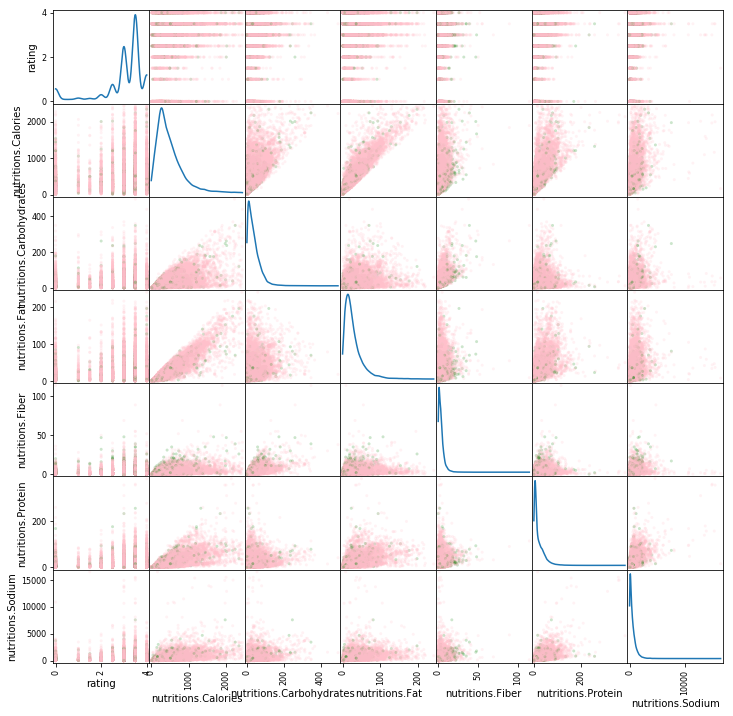

In [16]:
from pandas.plotting import scatter_matrix
scatter_matrix(df3.drop(['title', 'healthy', 'reviewcount', 'makeagain', 'nutritions.Cholesterol', 
                        'nutritions.Monounsaturated Fat', 'nutritions.Polyunsaturated Fat', 
                         'nutritions.Saturated Fat'], axis=1), alpha=0.2, figsize=(12, 12), diagonal='kde', c = color)

## 4. data analysis

In [ ]:
from sklearn import 